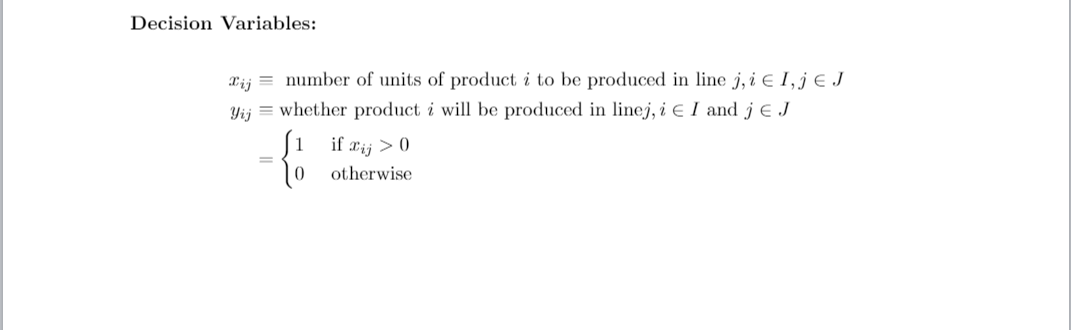

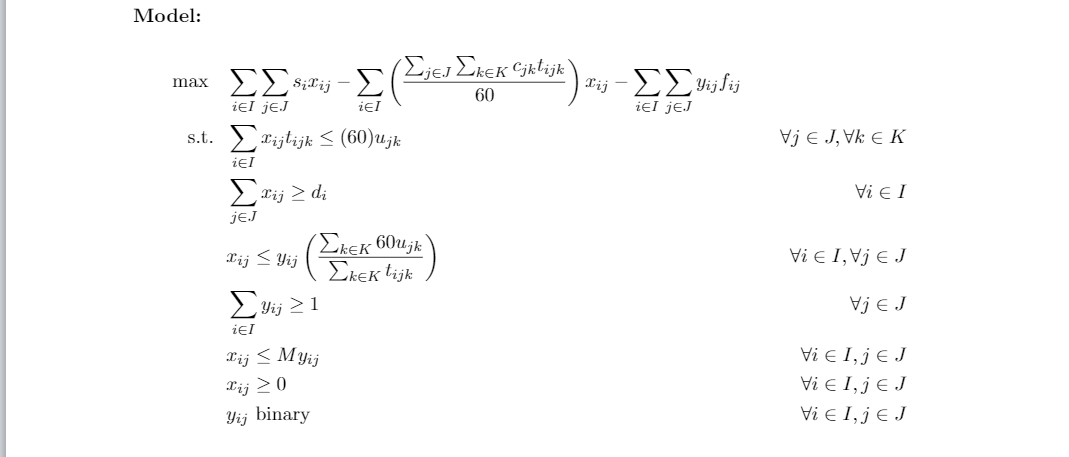

In [ ]:
# To call optimization library
!pip install cplex
!pip install docplex

     |████████████████████████████████| 30.9 MB 57.0 MB/s 
     |████████████████████████████████| 634 kB 5.1 MB/s 
  Created wheel for docplex: filename=docplex-2.22.213-py3-none-any.whl size=696882 sha256=b152e6c29f172350b59c18fd4930e754b63cf7dde78a8d23bc97058cf2501547
  Stored in directory: /root/.cache/pip/wheels/90/69/6b/1375c68a5b7ff94c40263b151c86f58bd72200bf0c465b5ba3
Successfully built docplex


In [ ]:
# Creating one model instance, with a name
from docplex.mp.model import Model

m = Model (name="OR_Lab_Final_Exam_Form_1")

In [ ]:
# products_Data= {"Product_Type":[Selling_Price, Demand,{"Production_Line_Num":Setup_Cost}]}
Products_Data = {"Product_1":[12,40,{"Line_1":70,"Line_2":25,"Line_3":50,"Line_4":40}],
                 "Product_2":[20,160,{"Line_1":80,"Line_2":75,"Line_3":60,"Line_4":25}],
                 "Product_3":[15,80,{"Line_1":50,"Line_2":35,"Line_3":30,"Line_4":35}],
                 "Product_4":[18,95,{"Line_1":60,"Line_2":30,"Line_3":20,"Line_4":40}],
                 "Product_5":[10,10,{"Line_1":45,"Line_2":70,"Line_3":40,"Line_4":35}]}

# Lines_Data= {"Production_Line_Num": {"Workstation_Num":[ Max_Working_Limit,Hourly_Cost]}}
#Lines_Data = {"Line_1":{"WS_1":[8,12],"WS_2":[5,8],"WS_3":[0,0],"WS_4":[0,0]},
#              "Line_2":{"WS_1":[5,6],"WS_2":[6,5],"WS_3":[8,7],"WS_4":[0,0]},
#              "Line_3":{"WS_1":[6,5],"WS_2":[6,4],"WS_3":[7,10],"WS_4":[4,5]},
#              "Line_4":{"WS_1":[8,15],"WS_2":[7,10],"WS_3":[0,0],"WS_4":[0,0]}}

WorkStations_Data = {"WS_1":{"Line_1":[8,12],"Line_2":[5,6],"Line_3":[6,5],"Line_4":[8,15]},
                     "WS_2":{"Line_1":[5,8],"Line_2":[6,5],"Line_3":[6,4],"Line_4":[7,10]},
                     "WS_3":{"Line_1":[0,0],"Line_2":[8,7],"Line_3":[7,10],"Line_4":[0,0]},
                     "WS_4":{"Line_1":[0,0],"Line_2":[0,0],"Line_3":[4,5],"Line_4":[0,0]}}

# Man_Time_Data= {"Production_Line_Num":{"Workstation_Num":{"Product_Type":Production_Time_Min}}}
Man_Time_Data = {"Line_1":{"WS_1":{"Product_1":15,"Product_2":7,"Product_3":8,"Product_4":10,"Product_5":15},
                           "WS_2":{"Product_1":0,"Product_2":6,"Product_3":8,"Product_4":2,"Product_5":4},
                           "WS_3":{"Product_1":0,"Product_2":0,"Product_3":0,"Product_4":0,"Product_5":0},
                           "WS_4":{"Product_1":0,"Product_2":0,"Product_3":0,"Product_4":0,"Product_5":0}},

                 "Line_2":{"WS_1":{"Product_1":4,"Product_2":2,"Product_3":5,"Product_4":2,"Product_5":4},
                           "WS_2":{"Product_1":5,"Product_2":3,"Product_3":4,"Product_4":6,"Product_5":2},
                           "WS_3":{"Product_1":1,"Product_2":5,"Product_3":4,"Product_4":1,"Product_5":13},
                           "WS_4":{"Product_1":0,"Product_2":0,"Product_3":0,"Product_4":0,"Product_5":0}},

                 "Line_3":{"WS_1":{"Product_1":2,"Product_2":4,"Product_3":5,"Product_4":3,"Product_5":4},
                          "WS_2":{"Product_1":5,"Product_2":3,"Product_3":4,"Product_4":1,"Product_5":7},
                          "WS_3":{"Product_1":1,"Product_2":2,"Product_3":5,"Product_4":6,"Product_5":7},
                          "WS_4":{"Product_1":2,"Product_2":3,"Product_3":4,"Product_4":1,"Product_5":5}},

                 "Line_4":{"WS_1":{"Product_1":7,"Product_2":10,"Product_3":2,"Product_4":10,"Product_5":13},
                           "WS_2":{"Product_1":4,"Product_2":3,"Product_3":4,"Product_4":0,"Product_5":10},
                           "WS_3":{"Product_1":0,"Product_2":0,"Product_3":0,"Product_4":0,"Product_5":0},
                           "WS_4":{"Product_1":0,"Product_2":0,"Product_3":0,"Product_4":0,"Product_5":0}}}
M= 1000000

#Lines_Data["Line_1"].keys()

In [ ]:
# Decision variables
x = {(i,j): m.integer_var(lb= 0, ub= None, name='Number of units of  {0} to be produced on  {1}'.format(i,j))for i in Products_Data.keys()
                                                    for j in Man_Time_Data.keys() }

y = {(i,j): m.binary_var( name='Whether {0} will be produced on  {1}'.format(i,j))for i in Products_Data.keys()
                                                    for j in Man_Time_Data.keys() }


In [ ]:
# Net_Profit = Total_revenues - Cost_Related_To_Machines - Setup_Cost
Total_Revenue = m.sum(x [(i,j)] * Products_Data[i][0]  for i in Products_Data.keys() for j in Man_Time_Data.keys()  )

Machines_Cost = m.sum(x [(i,j)] * WorkStations_Data [k][j][1] *Man_Time_Data[j][k][i] *(1/60)
                         for i in Products_Data.keys() for j in Man_Time_Data.keys() for k in WorkStations_Data.keys() )


Setup_Cost = m.sum(y[(i,j)] * Products_Data[i][2][j] for i in Products_Data.keys() for j in Man_Time_Data.keys())

Net_Profit = Total_Revenue -Machines_Cost- Setup_Cost
m.maximize (Net_Profit)

In [ ]:
# Defining the constraints
# Not to exceed the maximum working capacity in (Hrs) for each workstation within each line
for j in Man_Time_Data.keys():
  for k in WorkStations_Data.keys():
    m.add_constraint_(m.sum(x[(i,j)]* Man_Time_Data[j][k][i] for i in Products_Data.keys() ) <= 60* WorkStations_Data[k][j][0] )

# To endsure that the demand for each product is being satisfied
for i in Products_Data.keys():
  m.add_constraint_(m.sum(x[(i,j)]for j in Man_Time_Data.keys()  ) == Products_Data[i][1] )

# If a product is assigned to a specific line, it needs to be processed on all workstions of that line
for i in Products_Data.keys():
  for j in Man_Time_Data.keys():
    m.add_constraint_(x[(i,j)] <= y[(i,j)]* (sum(60*WorkStations_Data[k][j][0]for k in WorkStations_Data.keys())/ sum(Man_Time_Data[j][k][i] for k in WorkStations_Data.keys() ) ))


# To force all lines to work
for j in Man_Time_Data.keys():
  m.add_constraint_(m.sum(y[(i,j)]for i in Products_Data.keys()) >= 1 )

# The activation constarint (To ensure that the binary variable is (1) whenever a line is producing a specific product, "x_ij is greater than zero")
for i in Products_Data.keys():
  for j in Man_Time_Data.keys():
    m.add_constraint_(x[(i,j)] <= M* y[(i,j)])

In [ ]:
m.print_information()

# Solving the model
m.solve(log_output=True)


# Solution status
print(m.solve_details.status)

# printing solution
m.print_solution()

Model: OR_Lab_Final_Exam_Form_1
 - number of variables: 40
   - binary=20, integer=20, continuous=0
 - number of constraints: 65
   - linear=65
 - parameters: defaults
 - objective: maximize
 - problem type is: MILP
Version identifier: 20.1.0.1 | 2021-12-07 | 9dfdf6686
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 25 rows and 0 columns.
MIP Presolve modified 41 coefficients.
Reduced MIP has 40 rows, 40 columns, and 133 nonzeros.
Reduced MIP has 20 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.09 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 40 rows, 40 columns, and 133 nonzeros.
Reduced MIP has 20 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.08 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Clique table members: 3.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel 